# Project - Penguin Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv("D:\\Innomatics\\penguins_size.csv")
df.head()

species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
3  Adelie  Torgersen               NaN              NaN                NaN   
4  Adelie  Torgersen              36.7             19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE

In [ ]:
## Problem Statement:
# The goal of this analysis is to build a machine learning model that can predict the species of a penguin
# based on its physical characteristics and location. This is a classification problem where the model
# will learn patterns from the data to assign penguins to one of the three species: Adelie, Gentoo, or Chinstrap.

## Features and Target:

# Target Variable - species -> The species of the penguin (Adelie, Gentoo, Chinstrap). This is what we want to predict.

# Features - island, culmen_length_mm, culmen_depth_mm, flipper_length_mm, body_mass_g, sex

In [4]:
data = df.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


# Exploratory Data Analysis

In [7]:
data.shape

(344, 7)

In [8]:
data.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [10]:
data.describe()


culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
count        342.000000       342.000000         342.000000   342.000000
mean          43.921930        17.151170         200.915205  4201.754386
std            5.459584         1.974793          14.061714   801.954536
min           32.100000        13.100000         172.000000  2700.000000
25%           39.225000        15.600000         190.000000  3550.000000
50%           44.450000        17.300000         197.000000  4050.000000
75%           48.500000        18.700000         213.000000  4750.000000
max           59.600000        21.500000         231.000000  6300.000000

In [11]:
data.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [14]:
data.isna().sum()/len(data)

species              0.000000
island               0.000000
culmen_length_mm     0.005814
culmen_depth_mm      0.005814
flipper_length_mm    0.005814
body_mass_g          0.005814
sex                  0.029070
dtype: float64

In [15]:
data.dropna(inplace = True)

In [16]:
data.count()

species              334
island               334
culmen_length_mm     334
culmen_depth_mm      334
flipper_length_mm    334
body_mass_g          334
sex                  334
dtype: int64

In [18]:
data.sex.value_counts()

sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64

In [19]:
data_1=data[(data['sex']!='.')]

In [21]:
data_1.sex.value_counts()

sex
MALE      168
FEMALE    165
Name: count, dtype: int64

In [22]:
data_1.species.value_counts()

species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64

In [24]:
data_1.island.value_counts()

island
Biscoe       163
Dream        123
Torgersen     47
Name: count, dtype: int64

In [26]:
data_1.head()

species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
4  Adelie  Torgersen              36.7             19.3              193.0   
5  Adelie  Torgersen              39.3             20.6              190.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
4       3450.0  FEMALE  
5       3650.0    MALE

In [28]:
data_1.count()

species              333
island               333
culmen_length_mm     333
culmen_depth_mm      333
flipper_length_mm    333
body_mass_g          333
sex                  333
dtype: int64

# UniVariate Analysis


In [31]:
def cont_vis_analysis(data_1,col):
  ## visualisation of continuous numerical variable
  fig,axes=plt.subplots(1,3,figsize=(8,3),layout='constrained')
  fig.suptitle('Continuous Data Distributions')

  axes[0].set_title('Histogram')
  sns.histplot(data_1[col],ax=axes[0])

  axes[1].set_title('KDE plot')
  sns.kdeplot(data_1[col],ax=axes[1])

  axes[2].set_title('Boxplot')
  sns.boxplot(data_1[col],ax=axes[2])

  fig.show()

def cont_non_vis_analysis(data_1,col):
  ## Non visual analaysis of continuous numerical data
  series=data_1[col]
  print(series.agg(['count','min','max','mean','median','var','std','skew','kurt']).round(2))
  print()

count     333.00
min        32.10
max        59.60
mean       43.99
median     44.50
var        29.91
std         5.47
skew        0.05
kurt       -0.88
Name: culmen_length_mm, dtype: float64



C:\Users\lenovo\AppData\Local\Temp\ipykernel_5488\2658330944.py:15: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


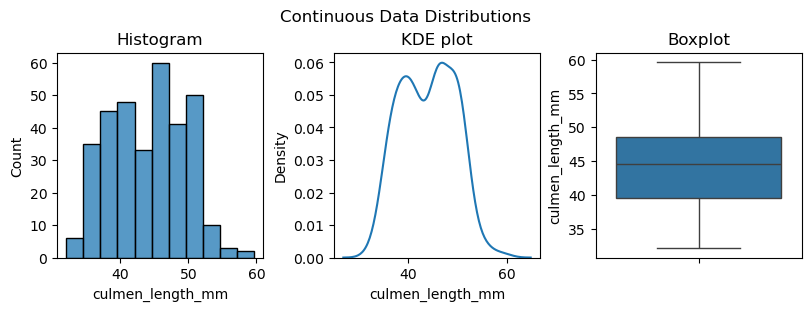

In [32]:
cont_non_vis_analysis(data_1,'culmen_length_mm')
cont_vis_analysis(data_1,'culmen_length_mm')

In [ ]:
## Observations in "culmen_length_mm"
# 1. Penguin's culmen length data has no outliers
# 2. Skewness is 0.05 → very slight positive skew, almost symmetrical
# 3. Kurtosis is -0.88 → distribution is slightly flat (platykurtic) compared to normal

count     333.00
min        13.10
max        21.50
mean       17.16
median     17.30
var         3.88
std         1.97
skew       -0.15
kurt       -0.89
Name: culmen_depth_mm, dtype: float64



C:\Users\lenovo\AppData\Local\Temp\ipykernel_5488\2658330944.py:15: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


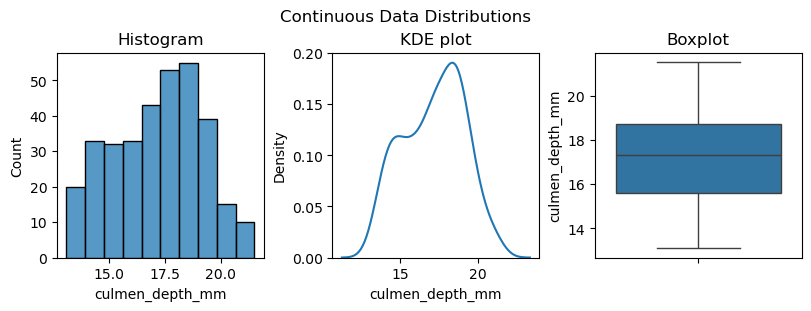

In [33]:
cont_non_vis_analysis(data_1,'culmen_depth_mm')
cont_vis_analysis(data_1,'culmen_depth_mm')

In [ ]:
## Observations in "culmen_depth_mm"
# 1. Penguin's culmen depth data has no outliers
# 2. Skewness is -0.15 → slight negative skew, but very close to symmetrical
# 3. Kurtosis is -0.89 → slightly flat (platykurtic) distribution

count     333.00
min       172.00
max       231.00
mean      200.97
median    197.00
var       196.44
std        14.02
skew        0.36
kurt       -0.96
Name: flipper_length_mm, dtype: float64



C:\Users\lenovo\AppData\Local\Temp\ipykernel_5488\2658330944.py:15: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


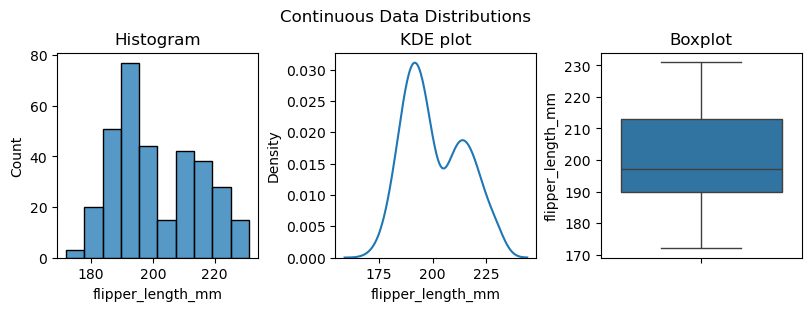

In [34]:
cont_non_vis_analysis(data_1,'flipper_length_mm')
cont_vis_analysis(data_1,'flipper_length_mm')

In [ ]:
## Observations in "flipper_length_mm"
# 1. Length of penguin's flipper data has no outliers
# 2. Skewness is 0.36 → moderate positive skew, confirming a slight tail on the right
# 3. Kurtosis is -0.96 → distribution is flatter than a normal curve (platykurtic)

count        333.00
min         2700.00
max         6300.00
mean        4207.06
median      4050.00
var       648372.49
std          805.22
skew           0.47
kurt          -0.73
Name: body_mass_g, dtype: float64



C:\Users\lenovo\AppData\Local\Temp\ipykernel_5488\2658330944.py:15: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


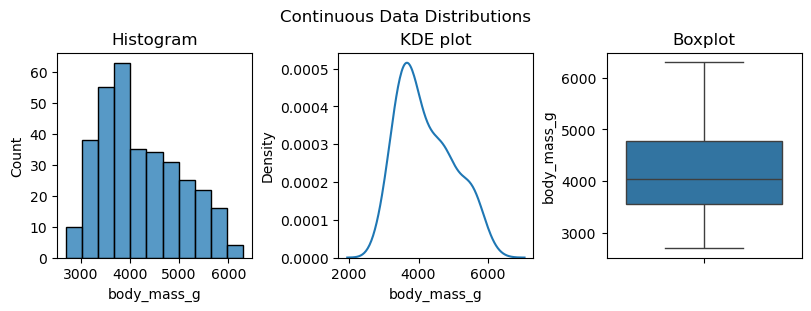

In [35]:
cont_non_vis_analysis(data_1,'body_mass_g')
cont_vis_analysis(data_1,'body_mass_g')

In [ ]:
## Observations in "body_mass_g"
# 1. Mass of the penguin in grams data has no outliers
# 2. Skewness is 0.47 → moderate positive skew, indicating heavier penguins are pulling the distribution right
# 3. Kurtosis is -0.73 → distribution is slightly flat (platykurtic) compared to normal

## Kurtosis:

- Zero excess kurtosis (≈ 0): The distribution is mesokurtic, meaning its tails and peak are similar to those of a normal distribution.

- Positive excess kurtosis (> 0): Indicates a leptokurtic distribution, with a sharper peak and heavier tails.

- Negative excess kurtosis (< 0): Indicates a platykurtic distribution, with a flatter peak and lighter tails.

In [41]:
def catg_disc_analysis(data,col):
  print("Value Counts for ",col)
  print(data[col].value_counts())
  print("Null values =",data[col].isna().sum())
  fig,axes=plt.subplots(1,2,figsize=(8,3),layout='constrained')
  fig.suptitle('Categorical / Discrete Num Data Distributions')

  axes[0].set_title('Bar Plot')
  sns.countplot(x=col,data=data,ax=axes[0])

  axes[1].set_title('Pie Chart')
  vc_data=data[col].value_counts()
  axes[1].pie(vc_data,labels=vc_data.index,autopct='%1.1f%%')
  fig.show()

In [39]:
data_1.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

Value Counts for  species
species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64
Null values = 0


C:\Users\lenovo\AppData\Local\Temp\ipykernel_5488\3351253826.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


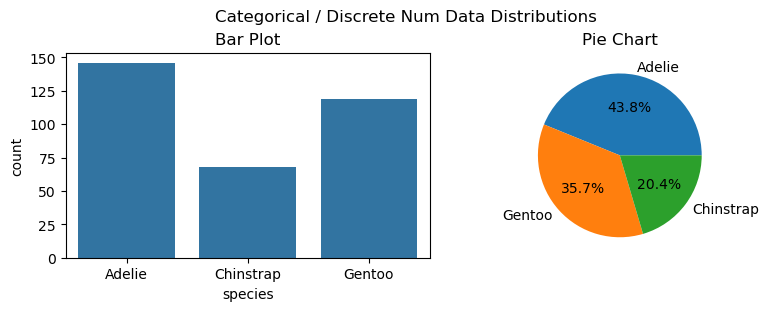

In [42]:
catg_disc_analysis(data_1,'species')

Value Counts for  island
island
Biscoe       163
Dream        123
Torgersen     47
Name: count, dtype: int64
Null values = 0


C:\Users\lenovo\AppData\Local\Temp\ipykernel_5488\3351253826.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


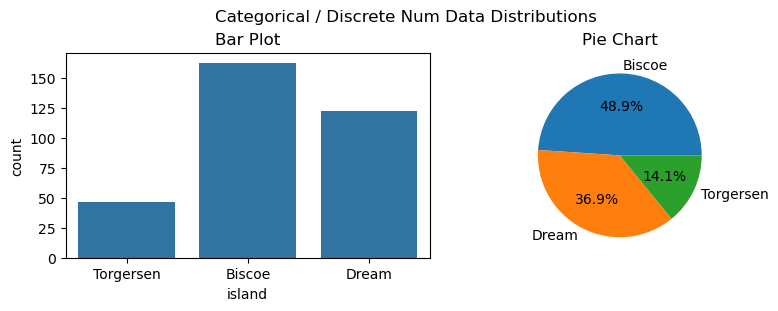

In [43]:
catg_disc_analysis(data_1,'island')


Value Counts for  sex
sex
MALE      168
FEMALE    165
Name: count, dtype: int64
Null values = 0


C:\Users\lenovo\AppData\Local\Temp\ipykernel_5488\3351253826.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


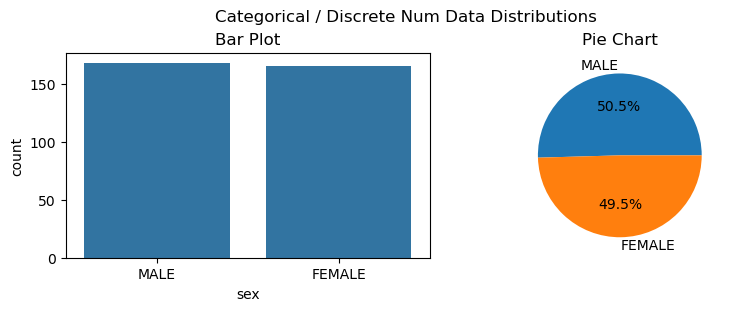

In [44]:
catg_disc_analysis(data_1,'sex')

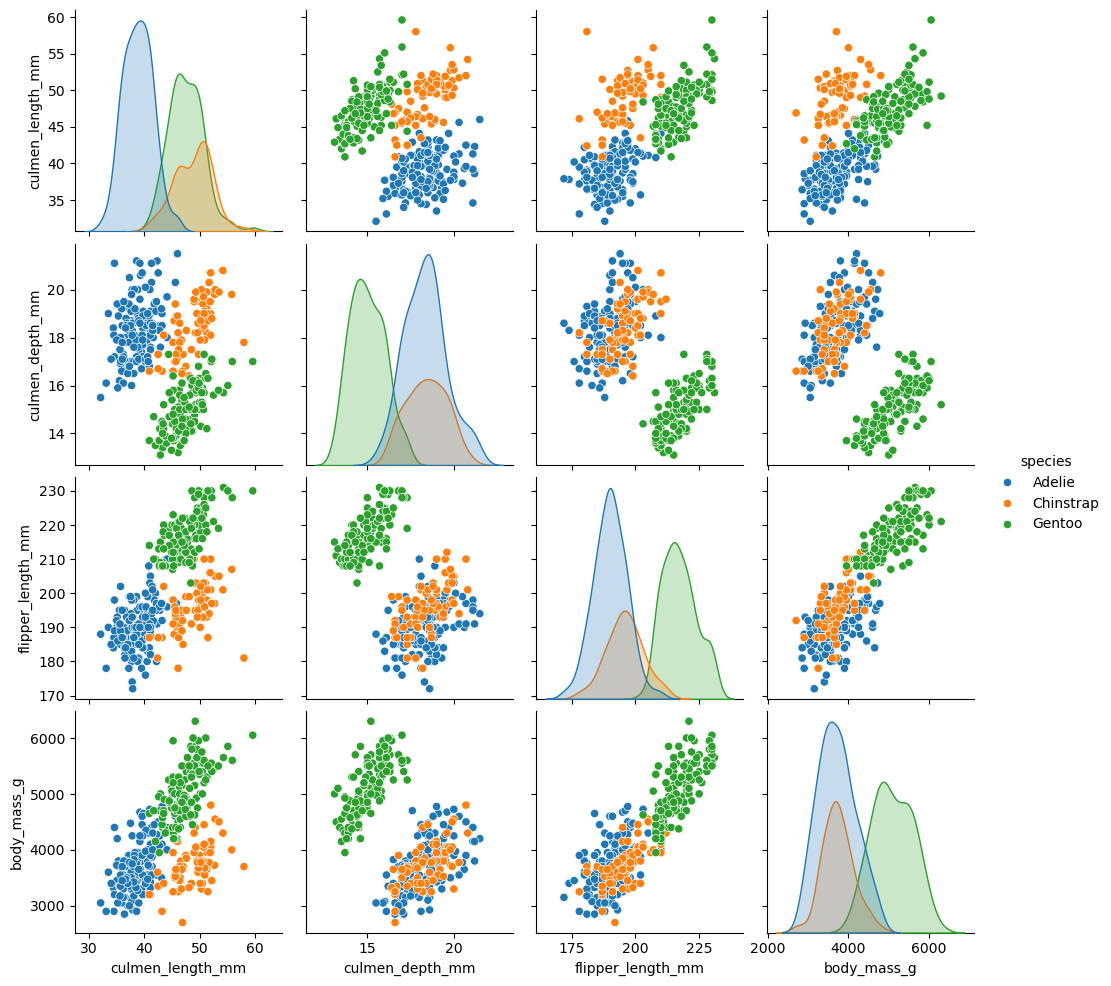

In [45]:
sns.pairplot(data, hue='species')

In [47]:
data

species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen              39.1             18.7              181.0   
1    Adelie  Torgersen              39.5             17.4              186.0   
2    Adelie  Torgersen              40.3             18.0              195.0   
4    Adelie  Torgersen              36.7             19.3              193.0   
5    Adelie  Torgersen              39.3             20.6              190.0   
..      ...        ...               ...              ...                ...   
338  Gentoo     Biscoe              47.2             13.7              214.0   
340  Gentoo     Biscoe              46.8             14.3              215.0   
341  Gentoo     Biscoe              50.4             15.7              222.0   
342  Gentoo     Biscoe              45.2             14.8              212.0   
343  Gentoo     Biscoe              49.9             16.1              213.0   

     body_mass_g     sex  
0         3750.0    MALE  
1         3800.0  FEMALE  
2         3250.0  FEMALE  
4         3450.0  FEMALE  
5         3650.0    MALE  
..           ...     ...  
338       4925.0  FEMALE  
340       4850.0  FEMALE  
341       5750.0    MALE  
342       5200.0  FEMALE  
343       5400.0    MALE  

[334 rows x 7 columns]

# Bivariate analysis


In [49]:
## Cont-Cont
def cont_cont_bivar_analysis(data_1,col1,col2,hue='species'):
  print(f"Covariance = {data_1[col1].cov(data[col2])}")
  print(f"Correlation = {data_1[col1].corr(data[col2])}")
  sns.scatterplot(x=col1,y=col2,data=data,hue='species')
  plt.show()

Covariance = -2.4620913383262786
Correlation = -0.22862563591302906


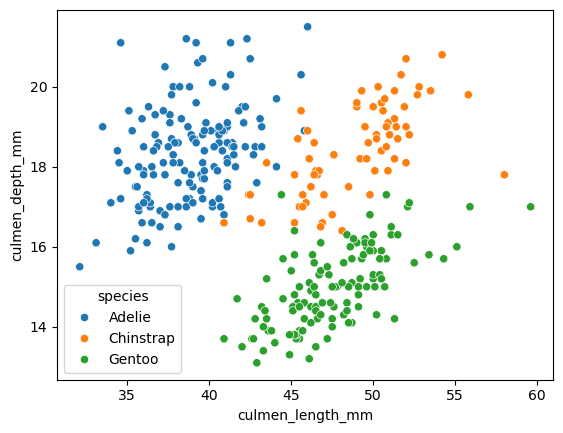

In [51]:
cont_cont_bivar_analysis(data_1,'culmen_length_mm','culmen_depth_mm')

In [54]:
# cont - cat bivariate
def cont_cat_bivar_analysis(data,cat_col,num_col):
  sns.boxplot(x=cat_col,y=num_col,data=data)

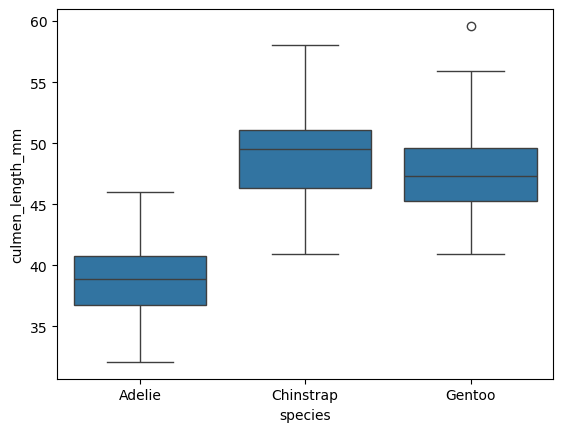

In [53]:
cont_cat_bivar_analysis(data,'species','culmen_length_mm')

In [ ]:
## Observations
# There is no outliers present while plotting between species and culmen length
# Average of Chinstrap species culmen lengthis more compare to other

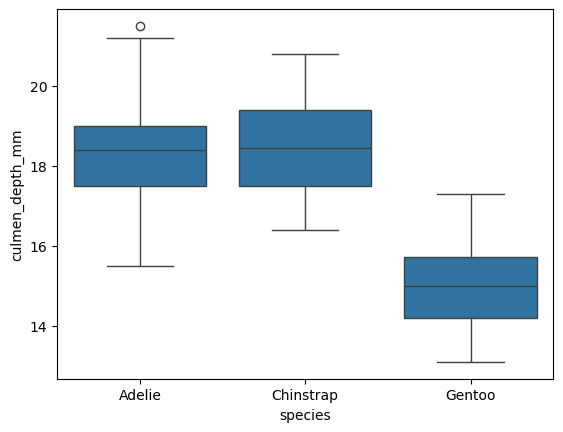

In [55]:
cont_cat_bivar_analysis(data,'species','culmen_depth_mm')

In [ ]:
## Observations
# There is one outlier present in Adelie species while plotting between species and culmen_depth

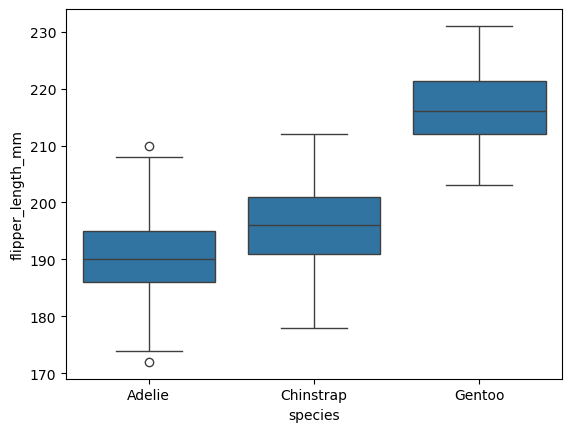

In [56]:
cont_cat_bivar_analysis(data,'species','flipper_length_mm')

In [57]:
## Observations
# There are two outlier present in Adelie species while plotting between species and flipper length

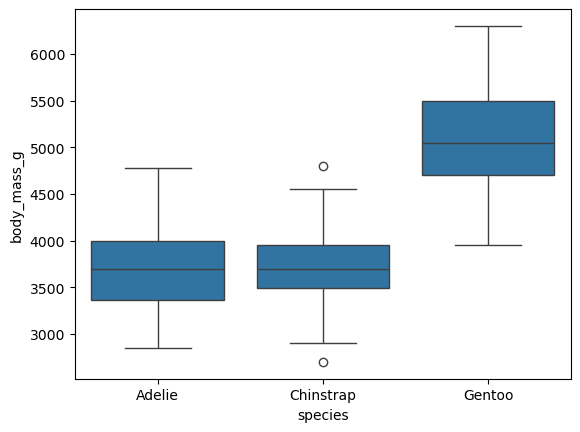

In [58]:
cont_cat_bivar_analysis(data,'species','body_mass_g')


In [59]:
## Observations
# There are two outlier present in Chinastrap species while plotting between species and body mass
# Average body mass of Adelie and Chinstrap species are nearly same

In [60]:
## cat - cat bivariate
def cat_cat_bivar_analysis(data,col1,col2):
  ct_data=pd.crosstab(data[col1],data[col2])
  ct_data.plot(kind='bar')

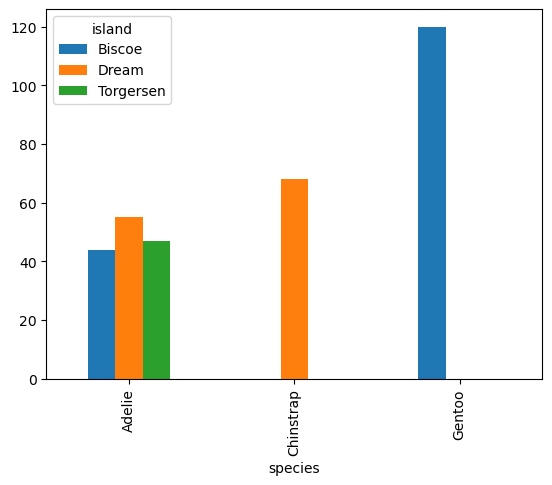

In [61]:
cat_cat_bivar_analysis(data,'species','island')

In [62]:
## Observations
# Only Adelie species found in three islands

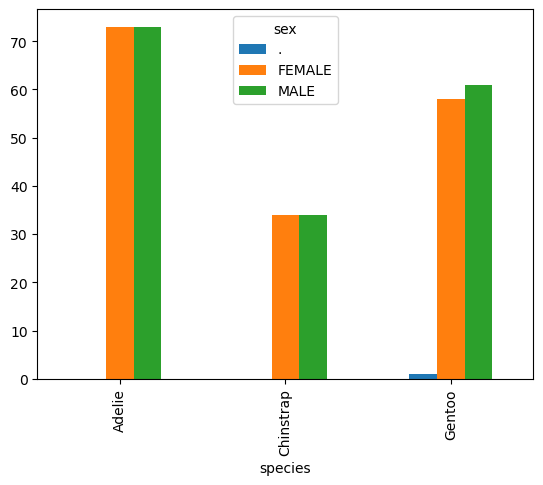

In [63]:
cat_cat_bivar_analysis(data,'species','sex')


# Label encoding

In [65]:
## handling categorical columns
## label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder() # create an object of LabelEncoder class
data_1['species_encoded']=le.fit_transform(data_1['species'])
data_1.head()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_5488\3422165807.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1['species_encoded']=le.fit_transform(data_1['species'])


species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
4  Adelie  Torgersen              36.7             19.3              193.0   
5  Adelie  Torgersen              39.3             20.6              190.0   

   body_mass_g     sex  species_encoded  
0       3750.0    MALE                0  
1       3800.0  FEMALE                0  
2       3250.0  FEMALE                0  
4       3450.0  FEMALE                0  
5       3650.0    MALE                0

In [67]:
le.classes_

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [68]:
## handling categorical columns
## label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder() # create an object of LabelEncoder class
data_1['island_encoded']=le.fit_transform(data_1['island'])
data_1.head()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_5488\1898466362.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1['island_encoded']=le.fit_transform(data_1['island'])


species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
4  Adelie  Torgersen              36.7             19.3              193.0   
5  Adelie  Torgersen              39.3             20.6              190.0   

   body_mass_g     sex  species_encoded  island_encoded  
0       3750.0    MALE                0               2  
1       3800.0  FEMALE                0               2  
2       3250.0  FEMALE                0               2  
4       3450.0  FEMALE                0               2  
5       3650.0    MALE                0               2

In [69]:
le.classes_

array(['Biscoe', 'Dream', 'Torgersen'], dtype=object)

In [70]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder() # create an object of LabelEncoder class
data_1['sex_encoded']=le.fit_transform(data_1['sex'])
data_1.head()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_5488\1207276350.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1['sex_encoded']=le.fit_transform(data_1['sex'])


species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
4  Adelie  Torgersen              36.7             19.3              193.0   
5  Adelie  Torgersen              39.3             20.6              190.0   

   body_mass_g     sex  species_encoded  island_encoded  sex_encoded  
0       3750.0    MALE                0               2            1  
1       3800.0  FEMALE                0               2            0  
2       3250.0  FEMALE                0               2            0  
4       3450.0  FEMALE                0               2            0  
5       3650.0    MALE                0               2            1

In [72]:
le.classes_

array(['FEMALE', 'MALE'], dtype=object)

In [73]:
data_1.drop(['species','island','sex'],axis=1,inplace=True)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_5488\3903998096.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1.drop(['species','island','sex'],axis=1,inplace=True)


In [74]:
data_1.head()

culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
0              39.1             18.7              181.0       3750.0   
1              39.5             17.4              186.0       3800.0   
2              40.3             18.0              195.0       3250.0   
4              36.7             19.3              193.0       3450.0   
5              39.3             20.6              190.0       3650.0   

   species_encoded  island_encoded  sex_encoded  
0                0               2            1  
1                0               2            0  
2                0               2            0  
4                0               2            0  
5                0               2            1

In [75]:
data_1.count()

culmen_length_mm     333
culmen_depth_mm      333
flipper_length_mm    333
body_mass_g          333
species_encoded      333
island_encoded       333
sex_encoded          333
dtype: int64

In [79]:
## duplicates check
data_1.duplicated().sum()

0

In [77]:
## scikit learn library
## Most popular library for standard machine learning -> LR , MLR, logistic regression, SVM, K-means
from sklearn.model_selection import train_test_split ## function to help in data split

In [78]:
train_df,test_df=train_test_split(data_1,test_size=0.2,shuffle=True)

In [80]:
train_df.shape,test_df.shape

((266, 7), (67, 7))

# model with Feature scaling

In [81]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler = StandardScaler() ## create object of class StandardScaler

numerical_columns=['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g','island_encoded','sex_encoded','species_encoded']
train_df_scaled = scaler.fit_transform(train_df[numerical_columns])
train_df_scaled=pd.DataFrame(train_df_scaled,columns=numerical_columns)
train_df_scaled

culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
0           -0.803923         0.843471          -0.829045     0.457286   
1           -0.274291         0.080677          -1.044262    -1.096994   
2           -1.717082         2.013090          -0.255132     0.208601   
3           -1.242239         1.148589          -1.259479    -0.413111   
4            1.040658         0.741765          -0.470349    -0.786138   
..                ...              ...                ...          ...   
261          0.912816         1.250295           0.749215     0.084258   
262         -0.456923         0.690912          -0.039915    -0.288769   
263          1.058921         0.080677          -0.255132    -0.692882   
264         -1.917977         0.945177          -0.829045    -0.786138   
265          1.241553         0.945177           0.605737    -0.164426   

     island_encoded  sex_encoded  species_encoded  
0          0.479870          1.0        -1.068103  
1          0.479870         -1.0         0.059339  
2          1.867321          1.0        -1.068103  
3          1.867321          1.0        -1.068103  
4          0.479870          1.0         0.059339  
..              ...          ...              ...  
261        0.479870          1.0         0.059339  
262        0.479870          1.0        -1.068103  
263        0.479870         -1.0         0.059339  
264        1.867321         -1.0        -1.068103  
265        0.479870          1.0         0.059339  

[266 rows x 7 columns]

In [82]:
test_df_scaled=scaler.transform(test_df[numerical_columns])
test_df_scaled=pd.DataFrame(test_df_scaled,columns=numerical_columns)
test_df_scaled

culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
0           0.638868        -1.088942           1.179649     0.892484   
1           2.556501         0.334941          -1.474697    -0.661796   
2           0.492762         0.385794          -0.470349    -1.159166   
3          -0.529975         0.945177          -1.402958    -1.003738   
4           0.529289        -0.275294          -0.685567    -1.905220   
..               ...              ...                ...          ...   
62          0.200552        -1.343207           0.390520     1.016826   
63         -1.991030        -0.529559          -1.689914    -1.656535   
64          0.164025        -1.953443           0.820954     1.078997   
65          0.255341         0.792618          -0.972523    -0.879395   
66         -1.041344         1.046883          -0.900784    -0.350940   

    island_encoded  sex_encoded  species_encoded  
0         -0.90758         -1.0         1.186782  
1          0.47987         -1.0         0.059339  
2          0.47987         -1.0         0.059339  
3          0.47987          1.0        -1.068103  
4          0.47987         -1.0         0.059339  
..             ...          ...              ...  
62        -0.90758         -1.0         1.186782  
63         0.47987         -1.0        -1.068103  
64        -0.90758         -1.0         1.186782  
65         0.47987         -1.0         0.059339  
66         0.47987          1.0        -1.068103  

[67 rows x 7 columns]

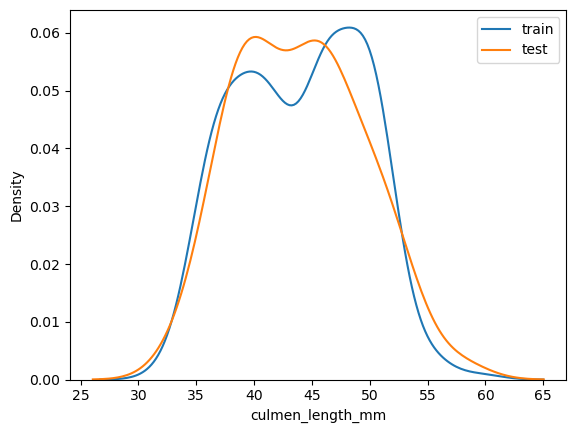

In [83]:
sns.kdeplot(x='culmen_length_mm',data=train_df,label='train')
sns.kdeplot(x='culmen_length_mm',data=test_df,label='test')
plt.legend()

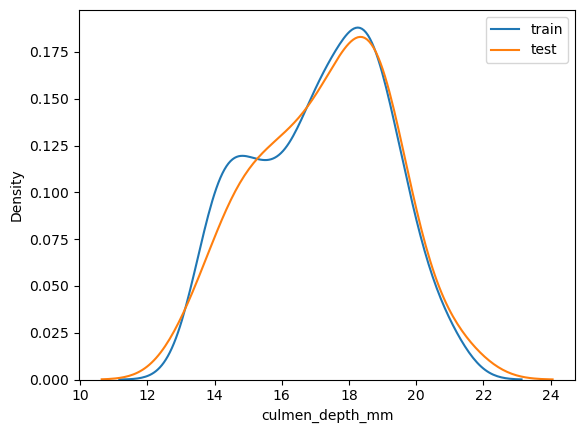

In [85]:
sns.kdeplot(x='culmen_depth_mm',data=train_df,label='train')
sns.kdeplot(x='culmen_depth_mm',data=test_df,label='test')
plt.legend()

# Using Linear regression algorithm.


In [86]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
## mean_squared_error = loss function
## r2_score = accuracy


In [87]:
lr_model=LinearRegression(fit_intercept=True)

In [90]:
x_train=train_df_scaled[['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g','island_encoded','sex_encoded']].to_numpy()
print(x_train.shape)

(266, 6)


In [91]:
y_train=train_df_scaled['species_encoded'].to_numpy()
print(y_train.shape)

(266,)


In [92]:
x_test=test_df_scaled[['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g','island_encoded','sex_encoded']].to_numpy()
print(x_test.shape)

(67, 6)


In [93]:
y_test=test_df_scaled['species_encoded'].to_numpy()
print(y_test.shape)

(67,)


In [94]:
## Model training step
lr_model.fit(x_train,y_train)
# This will automatically stop at minima
print("Training completed")

Training completed


In [95]:
## Training accuracy

y_pred = lr_model.predict(x_train) ## lr_model is storing the best fit function y=Wx

mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score (Accuracy): {r2}")

Mean Squared Error: 0.07240067385897497
R² Score (Accuracy): 0.927599326141025


In [96]:
## Model Evaluation - testing error and accuracy

y_pred = lr_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 0.09033789932918225
R² Score: 0.9092635331124275


# using linear regression the accuracy is not good so we use knn regression

In [101]:
x_train
y_train
x_test
y_test

array([ 1.18678166,  0.05933908,  0.05933908, -1.06810349,  0.05933908,
        1.18678166,  1.18678166, -1.06810349, -1.06810349,  1.18678166,
       -1.06810349, -1.06810349, -1.06810349, -1.06810349,  1.18678166,
       -1.06810349, -1.06810349,  1.18678166,  1.18678166, -1.06810349,
       -1.06810349, -1.06810349,  1.18678166,  0.05933908,  1.18678166,
       -1.06810349,  1.18678166,  0.05933908, -1.06810349,  1.18678166,
       -1.06810349, -1.06810349,  1.18678166, -1.06810349,  0.05933908,
        0.05933908,  0.05933908, -1.06810349,  0.05933908,  1.18678166,
       -1.06810349,  1.18678166,  1.18678166, -1.06810349, -1.06810349,
       -1.06810349, -1.06810349, -1.06810349,  0.05933908, -1.06810349,
        1.18678166,  1.18678166, -1.06810349, -1.06810349, -1.06810349,
        1.18678166, -1.06810349, -1.06810349, -1.06810349,  1.18678166,
        0.05933908, -1.06810349,  1.18678166, -1.06810349,  1.18678166,
        0.05933908, -1.06810349])

# KNN regression


In [103]:
from sklearn.neighbors import KNeighborsRegressor ## Class for KNN regression
from sklearn.metrics import mean_squared_error, r2_score

In [104]:
knn_model = KNeighborsRegressor(n_neighbors=5)

In [105]:
knn_model.fit(x_train,y_train)
## as training process, KNN algorithm stores all training data points
print("Training completed")

Training completed


In [106]:
y_pred = knn_model.predict(x_train)
y_pred

array([-1.06810349, -0.16614943, -1.06810349, -1.06810349,  0.05933908,
       -1.06810349,  1.18678166,  0.05933908,  0.05933908,  0.05933908,
       -0.84261498,  1.18678166, -0.39163795,  1.18678166,  1.18678166,
       -1.06810349,  1.18678166, -1.06810349, -1.06810349, -1.06810349,
        1.18678166,  1.18678166, -1.06810349,  0.05933908,  1.18678166,
       -1.06810349, -1.06810349,  1.18678166,  0.05933908, -1.06810349,
       -1.06810349, -1.06810349, -1.06810349, -1.06810349, -1.06810349,
        1.18678166, -1.06810349, -1.06810349,  1.18678166,  1.18678166,
        0.05933908,  1.18678166, -1.06810349,  0.05933908, -1.06810349,
       -0.16614943, -1.06810349, -1.06810349,  1.18678166,  0.05933908,
       -1.06810349,  1.18678166,  1.18678166,  1.18678166,  1.18678166,
        0.05933908,  1.18678166, -1.06810349, -1.06810349,  1.18678166,
       -1.06810349, -1.06810349,  1.18678166,  1.18678166, -1.06810349,
       -1.06810349,  1.18678166,  1.18678166, -1.06810349,  0.05

In [107]:
mse = mean_squared_error(y_train, y_pred) ## calculate MSE
r2 = r2_score(y_train, y_pred)
print('Evaluation of model on training data itself')
print(f"Mean Squared Error: {mse}")
print(f"R² Score (Accuracy): {r2}")

Evaluation of model on training data itself
Mean Squared Error: 0.004396378269617709
R² Score (Accuracy): 0.9956036217303823


In [108]:
knn_model.score(x_train,y_train)

0.9956036217303823

In [109]:
## Model Evaluation - testing error and accuracy

y_pred = knn_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 0.006829934832877869
R² Score: 0.9931399317406143


In [110]:
knn_model.score(x_test,y_test)

0.9931399317406143

In [111]:
def model_evaluation(knn_model,x,y):
  y_pred = knn_model.predict(x)
  mse = mean_squared_error(y, y_pred) ## calculate MSE
  r2 = r2_score(y, y_pred)
  return mse,r2

In [112]:
for i in range(1,15):
  knn_model=KNeighborsRegressor(n_neighbors=i)
  knn_model.fit(x_train,y_train)
  mse,r2=model_evaluation(knn_model,x_train,y_train)
  print(f'K = {i}')
  print(f"Training : Mean Squared Error: {mse} | R² Score (Accuracy): {r2}")
  mse,r2=model_evaluation(knn_model,x_test,y_test)
  print(f"Testing : Mean Squared Error: {mse} | R² Score (Accuracy): {r2}")
  print('-'*40,'\n')

K = 1
Training : Mean Squared Error: 0.0 | R² Score (Accuracy): 1.0
Testing : Mean Squared Error: 0.01897204120243852 | R² Score (Accuracy): 0.9809442548350398
---------------------------------------- 

K = 2
Training : Mean Squared Error: 0.0023893360160965804 | R² Score (Accuracy): 0.9976106639839034
Testing : Mean Squared Error: 0.00474301030060963 | R² Score (Accuracy): 0.9952360637087599
---------------------------------------- 

K = 3
Training : Mean Squared Error: 0.0031857813547954412 | R² Score (Accuracy): 0.9968142186452046
Testing : Mean Squared Error: 0.0021080045780487245 | R² Score (Accuracy): 0.997882694981671
---------------------------------------- 

K = 4
Training : Mean Squared Error: 0.004778672032193161 | R² Score (Accuracy): 0.9952213279678068
Testing : Mean Squared Error: 0.004743010300609631 | R² Score (Accuracy): 0.9952360637087599
---------------------------------------- 

K = 5
Training : Mean Squared Error: 0.004396378269617709 | R² Score (Accuracy): 0.99560

In [113]:
def model_evaluation(knn_model,x,y):
  y_pred = knn_model.predict(x)
  mse = mean_squared_error(y, y_pred) ## calculate MSE
  r2 = r2_score(y, y_pred)
  return mse,r2

In [ ]:
## Model Evaluation - testing error and accuracy

y_pred = lr_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 0.09033789932918225
R² Score: 0.9092635331124275


In [114]:
knn_model=KNeighborsRegressor(n_neighbors=3)
knn_model.fit(x_train,y_train)
mse,r2=model_evaluation(knn_model,x_train,y_train)
print("K = 3")
print(f"Training : Mean Squared Error: {mse} | R² Score (Accuracy): {r2}")
mse,r2=model_evaluation(knn_model,x_test,y_test)
print(f"Testing : Mean Squared Error: {mse} | R² Score (Accuracy): {r2}")

K = 3
Training : Mean Squared Error: 0.0031857813547954412 | R² Score (Accuracy): 0.9968142186452046
Testing : Mean Squared Error: 0.0021080045780487245 | R² Score (Accuracy): 0.997882694981671


In [115]:
## Conclusion on Hyperparameter tuning
# Based on training MSE , training R2 score and testing R2 score => K= 3 is the best value of K for given use case